In [30]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [31]:
absolut_path = "../Datasets/sintetic_dataset/fusion_transformer_result"

data_ground_truth = torch.load(f"{absolut_path}/ground_truth.pt")
data_predicted = torch.load(f"{absolut_path}/predicted_vet.pt")

In [40]:
data_predicted.shape

torch.Size([1088, 200, 7])

### First channel

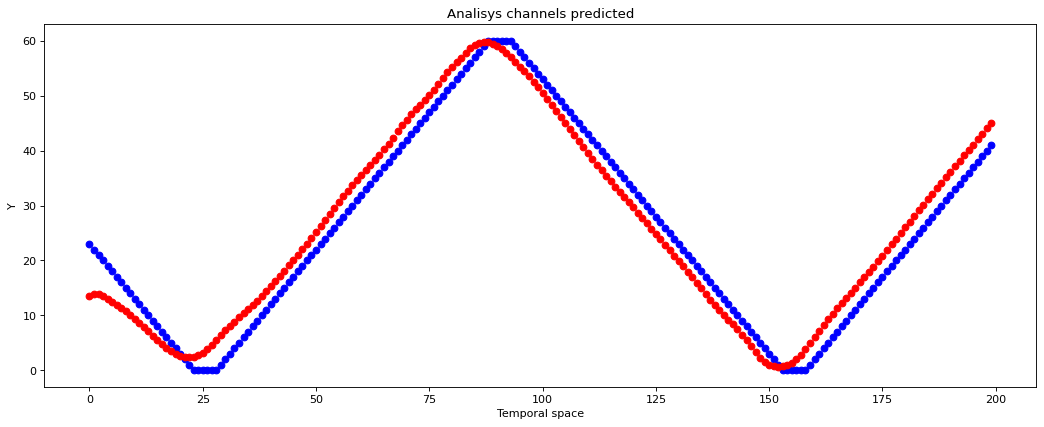

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0

middle = 3
slice_data = 1

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
#plt.plot(data_ground_truth[slice_data], color='blue', label='sinal Real')
#plt.plot(data_predicted[slice_data, :, 3], color='r', label='sinal previsto')

plt.plot(data_ground_truth[slice_data], "o", color='blue', label='sinal Real')
plt.plot(data_predicted[slice_data, :, 3], "o", color='r', label='sinal previsto')

In [33]:
slice_data_true = data_ground_truth[slice_data]
slice_data_pred = data_predicted[slice_data, :, middle]

abs_data = abs(slice_data_true - slice_data_pred)
abs_data

tensor([9.4417, 8.0890, 7.1942, 6.5323, 6.0063, 5.5560, 5.1216, 4.6879, 4.2717,
        3.8936, 3.5668, 3.2951, 3.0721, 2.8820, 2.7014, 2.5024, 2.2572, 1.9408,
        1.5319, 1.0126, 0.3680, 0.4151, 1.3500, 2.4520, 2.7373, 3.2152, 3.8731,
        4.6711, 5.5492, 5.4433, 5.3030, 5.1115, 4.8767, 4.6171, 4.3549, 4.1093,
        3.8914, 3.7048, 3.5480, 3.4175, 3.3114, 3.2292, 3.1694, 3.1274, 3.0966,
        3.0711, 3.0494, 3.0354, 3.0372, 3.0641, 3.1223, 3.2113, 3.3225, 3.4408,
        3.5499, 3.6370, 3.6946, 3.7204, 3.7146, 3.6791, 3.6165, 3.5321, 3.4355,
        3.3426, 3.2746, 3.2529, 3.2904, 3.3813, 3.4990, 3.6005, 3.6427, 3.6060,
        3.5010, 3.3595, 3.2222, 3.1324, 3.1239, 3.1901, 3.2643, 3.2794, 3.2213,
        3.1037, 2.9537, 2.8147, 2.6316, 2.2500, 1.6238, 0.7763, 0.2747, 0.5177,
        0.9343, 1.4982, 2.1833, 2.9639, 2.8074, 2.6808, 2.5697, 2.4832, 2.4396,
        2.4509, 2.5139, 2.6121, 2.7252, 2.8384, 2.9441, 3.0398, 3.1248, 3.1994,
        3.2655, 3.3274, 3.3904, 3.4574, 

In [34]:
data_ground_truth.shape

torch.Size([1088, 200])

In [35]:
from soft_dtw_cuda import SoftDTW

sdtw = SoftDTW(use_cuda=True, gamma=0.1)

def smape_loss(y_pred, target):
    # y_pred = y_pred.squeeze(2)
    loss = 2 * abs((y_pred - target)) / (abs(y_pred) + abs(target) + 1e-8)
    return loss.mean()*100

In [39]:
# def soft_dtw(y_pred, target):
#     #loss = sdtw(y_pred.unsqueeze(2), target.unsqueeze(2))
#     loss = sdtw(y_pred[np.newaxis, :, np.newaxis],
#                 target[np.newaxis, :, np.newaxis])
    
#     return loss.mean()

slice_data_true = data_ground_truth[slice_data]
slice_data_pred = data_predicted[slice_data, :, middle]

abs_data = abs(slice_data_true - slice_data_pred)
# Mean absolut error
print(f"Mean absolut error: {abs_data.mean()}")

sum_square = 0
for i, elem in enumerate(slice_data_true):
    sum_square += (slice_data_true[i] - slice_data_pred[i])**2

sum_square = sum_square/(i+1)
    
#Mean square error
print(f"Mean square error: {sum_square}")

#SMAPE
print(f"smape loss: {smape_loss(slice_data_true, slice_data_pred)}")

#soft DTW

# soft_dtw(slice_data_true, slice_data_pred)

Mean absolut error: 3.3663830757141113
Mean square error: 12.70495319366455
smape loss: 34.10843276977539


In [38]:
import numpy as np
# In terms of interpreting the SMAPE, a value of zero indicates perfect accuracy,
# while larger values indicate greater forecasting error. A SMAPE of 100%
# indicates that the model's forecasts are completely off-base,
# predicting values that are twice the actual values on average.


print(f"differents form: {smape_loss(np.arange(1,100), np.arange(100,1, -1))}")
print(f"same form: {smape_loss(np.arange(1,100), np.arange(1, 100))}")

differents form: 98.02980297059212
same form: 0.0


In [45]:
def transform_for_days(x):
    x = ((x*10)/60)/24
    return x

def transform_for_hour(x):
    x = (x*24)
    return x

def transform_for_min(x):
    x = (x*60)
    return x

print(transform_for_days(200))
print(transform_for_hour(0.38))
print(transform_for_hour(0.12))

1.388888888888889
9.120000000000001
2.88
